# Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import data

In [46]:
df = pd.read_csv("Housing.csv")

In [47]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [48]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [49]:
X = df
X = X.drop('price', axis= 1)

In [50]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [51]:
y = df["price"]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

# Drop duplicates if any

In [91]:
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# House pricing distribution data

How the data is distributed

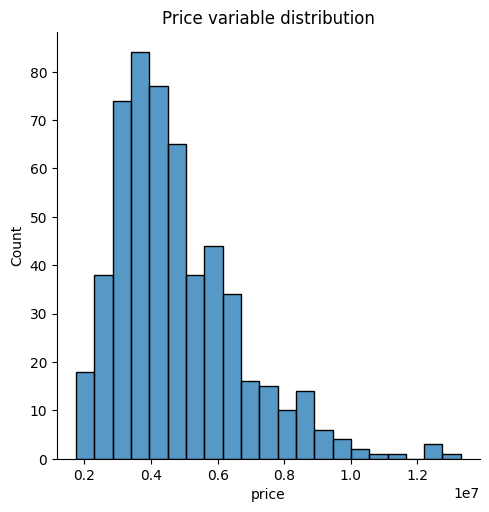

In [52]:
sns.displot(y)
plt.title("Price variable distribution")
plt.show()

# Pairplot

Plotting of numerical Data with the prices data

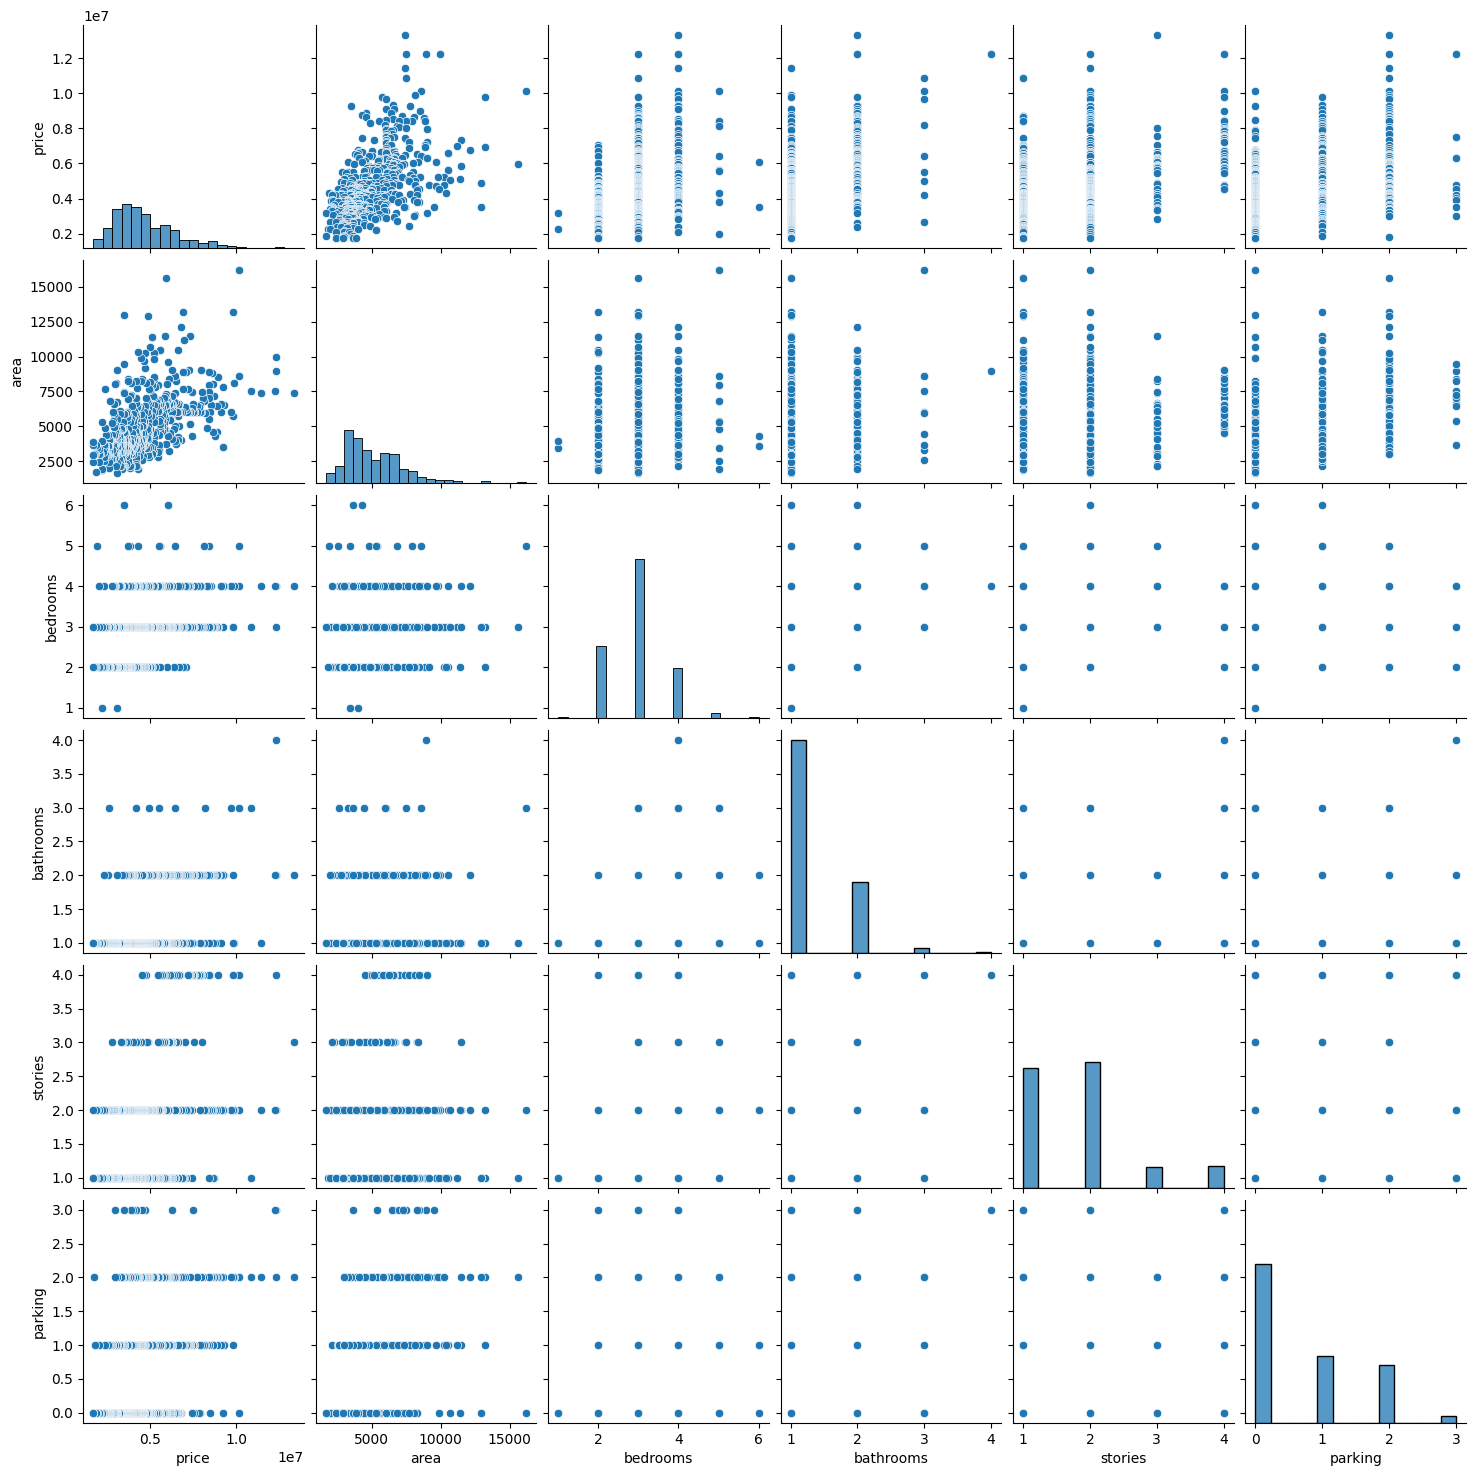

In [53]:
sns.pairplot(df)
plt.show()

# View summary stats

In [54]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Analyse and remove outliers

In [55]:
y.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

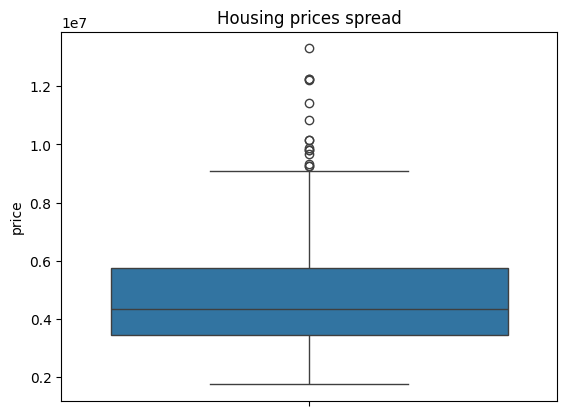

In [56]:
sns.boxplot(y)
plt.title("Housing prices spread")
plt.show()

In [57]:
# I will remove outlier which is having the price more or less than the 3*std from the mean of the price

upper_limit = 3*df["price"].std()+df["price"].mean()
upper_limit

10378048.0946786

In [58]:
lower_limit = -3*df["price"].std()+df["price"].mean()
lower_limit

-844589.5992657552

In [59]:
df[(df["price"]>upper_limit) | (df["price"]<lower_limit)]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [60]:
df = df[(df["price"]<upper_limit) & (df["price"]>lower_limit)]

In [61]:
df.shape

(539, 13)

In [79]:
X = df
X = X.drop('price', axis= 1)
y = df['price']

# Distribution of categorical data

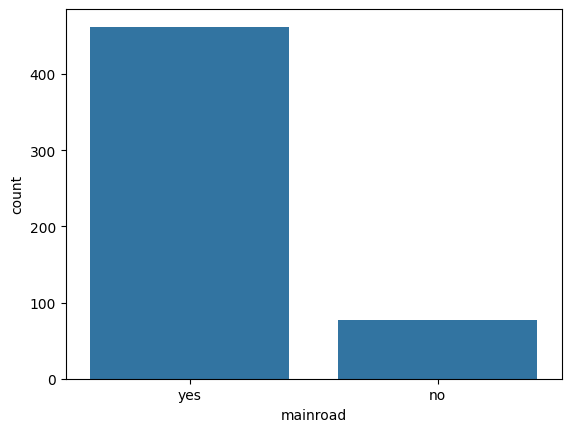

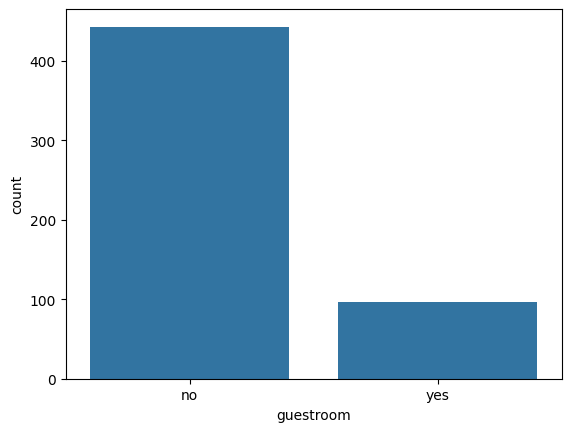

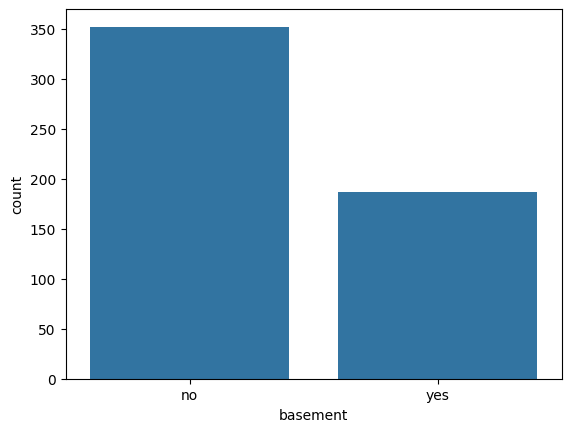

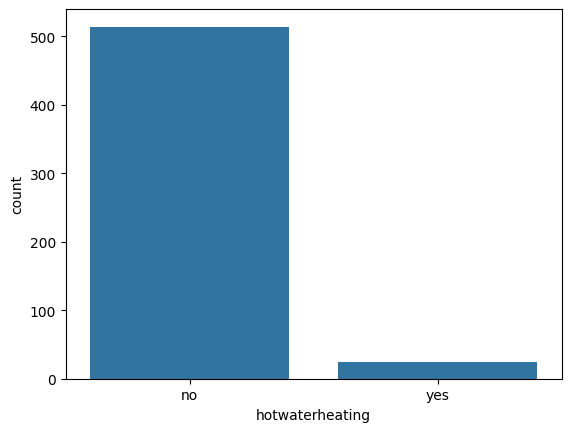

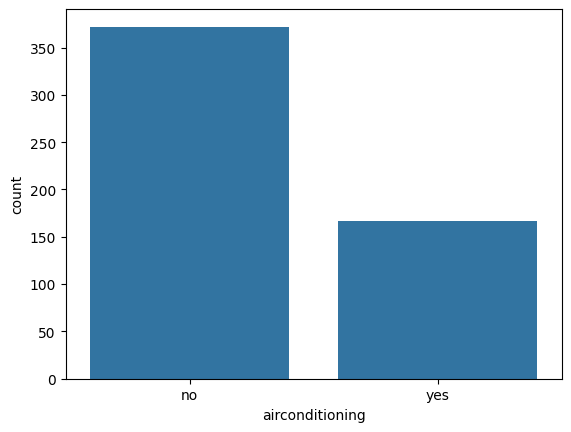

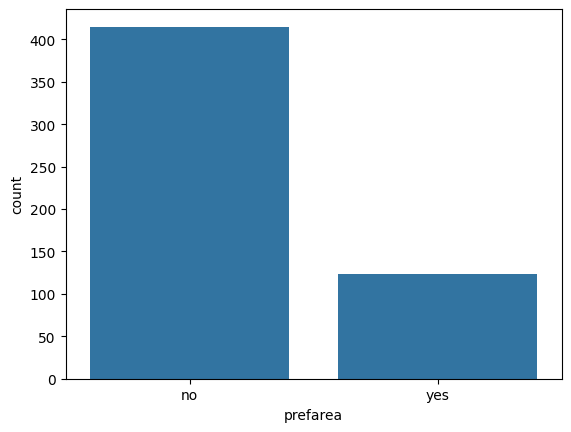

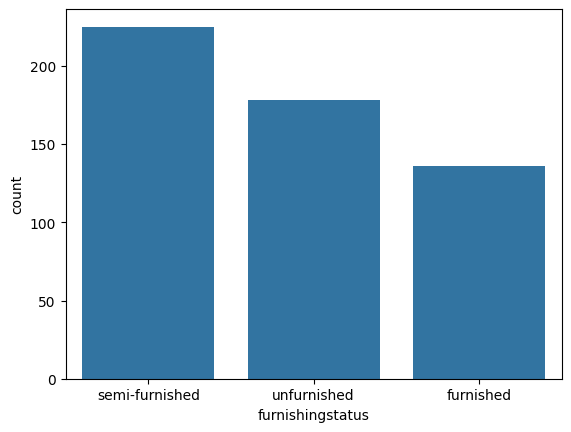

In [67]:
for column in X.columns:
    if df[column].dtype == object:
        sns.barplot(X[column].value_counts())
        plt.show()

# Label encoding

In [68]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(series)
    return le.transform(series) 

# One Hot encoding

In [69]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

# Encoding the categorical features

In [73]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        lenght = len(pd.unique(X[X.columns[col]]))
        if lenght == 2 or lenght > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [80]:
X_temp = EncodingSelection(X)

In [81]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,5750,3,2,4,1,1,0,0,1,1,1,unfurnished
10,13200,3,1,2,1,0,1,0,1,2,1,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [82]:
def top_x(df,variable,top_x_labels): # this will basically one hote encode our categorical data with respect to the categorical values
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label,1,0)

In [83]:
top_x(X, 'furnishingstatus', X["furnishingstatus"].unique())

In [85]:
X.drop("furnishingstatus", axis=1, inplace=True)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,furnishingstatus_furnished
6,8580,4,3,4,1,0,0,0,1,2,1,1,0,0
7,16200,5,3,2,1,0,0,0,0,0,0,0,1,0
8,8100,4,1,2,1,1,1,0,1,2,1,0,0,1
9,5750,3,2,4,1,1,0,0,1,1,1,0,1,0
10,13200,3,1,2,1,0,1,0,1,2,1,0,0,1


In [86]:
pd.concat([X,y],axis=1).corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,furnishingstatus_furnished,price
area,1.000000,0.141382,0.168400,0.074650,0.286284,0.144755,0.038259,-0.005950,0.213421,0.334899,0.224912,0.006777,-0.133555,0.136917,0.529053
bedrooms,0.141382,1.000000,0.372731,0.403735,-0.016464,0.079691,0.095209,0.048740,0.147859,0.120699,0.073612,0.059297,-0.120077,0.062694,0.358331
bathrooms,0.168400,0.372731,1.000000,0.319048,0.034552,0.147203,0.102262,0.075645,0.167588,0.136582,0.045262,0.032912,-0.121682,0.094388,0.491267
stories,0.074650,0.403735,0.319048,1.000000,0.120100,0.046222,-0.169309,0.020515,0.290050,0.030278,0.045134,0.004718,-0.079145,0.080340,0.433177
mainroad,0.286284,-0.016464,0.034552,0.120100,1.000000,0.093043,0.041372,-0.010804,0.101552,0.200439,0.197962,0.012287,-0.130451,0.127299,0.307003
guestroom,0.144755,0.079691,0.147203,0.046222,0.093043,1.000000,0.373812,-0.010438,0.139006,0.041069,0.171842,0.009103,-0.100046,0.097993,0.285290
basement,0.038259,0.095209,0.102262,-0.169309,0.041372,0.373812,1.000000,0.006052,0.042660,0.040127,0.222077,0.046939,-0.113998,0.070142,0.178554
hotwaterheating,-0.005950,0.048740,0.075645,0.020515,-0.010804,-0.010438,0.006052,1.000000,-0.128689,0.074171,-0.057671,0.063756,-0.061075,-0.006255,0.112677
airconditioning,0.213421,0.147859,0.167588,0.290050,0.101552,0.139006,0.042660,-0.128689,1.000000,0.138503,0.110397,-0.046475,-0.086591,0.146526,0.449557
parking,0.334899,0.120699,0.136582,0.030278,0.200439,0.041069,0.040127,0.074171,0.138503,1.000000,0.074263,0.049123,-0.154766,0.111806,0.338421


# Train test split

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42) # splitting of the dataset into training dataset and testing dataset

# Feature scaling

In [88]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler(with_mean=False)

In [89]:
sc.fit(x_train)
x_train = sc.transform(x_train)

In [90]:
sc.fit(x_test)
x_test = sc.transform(x_test)

# Multiple Linear Regression Model

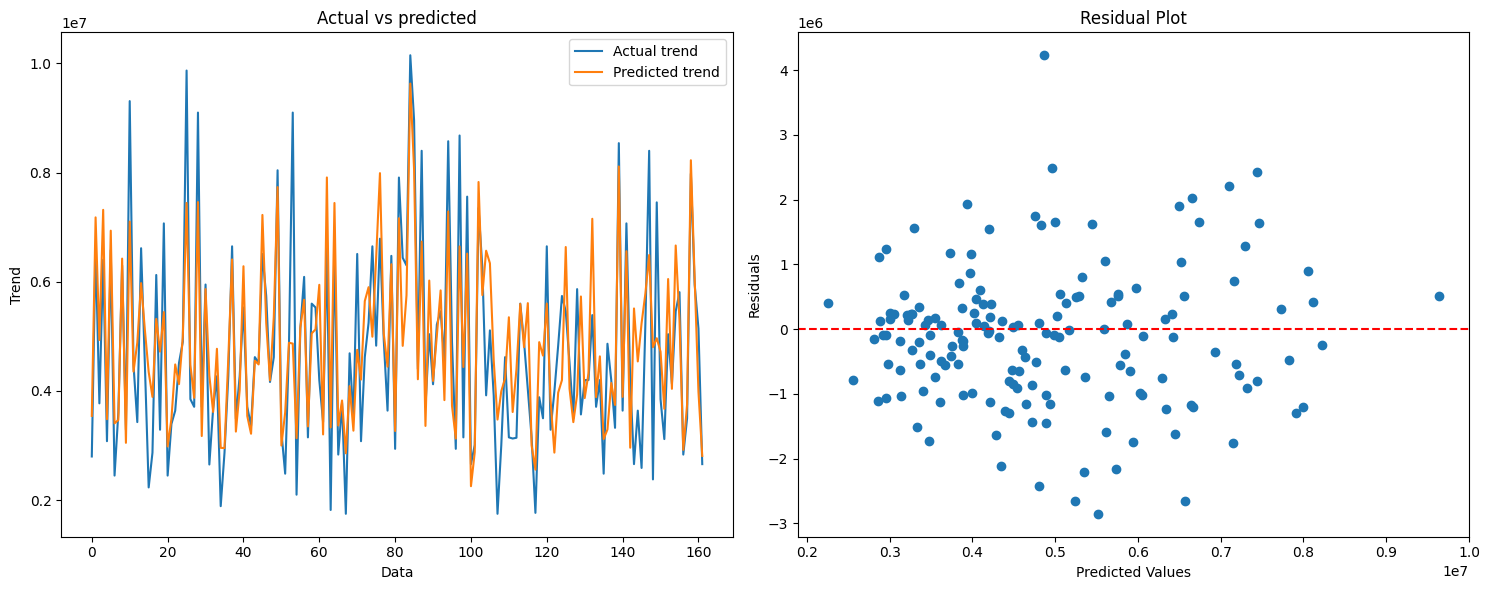

Evaluated score ----> 0.6532726734492658


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lin_reg= LinearRegression() # instatiate the object linear reg model
mse = cross_val_score(lin_reg, x_train,y_train, scoring="neg_mean_squared_error", cv= 10) # K fold cross validation here k =5
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)


# Evaluation of the trained model on test dataset
plt.figure(figsize=(15, 6))
from sklearn.metrics import r2_score
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_pred)
plt.legend(["Actual trend","Predicted trend"])
plt.xlabel('Data')
plt.ylabel('Trend')
plt.title("Actual vs predicted")

# Plot residuals

plt.subplot(1,2,2)
residuals= y_test - y_pred
# plt.subplot(1,2,2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
print("Evaluated score ---->" ,r2_score(y_test, y_pred))

c:\Users\ayush\Desktop\Study\big oh training\Big oh training\Big-Oh-Training\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.22592e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ayush\Desktop\Study\big oh training\Big oh training\Big-Oh-Training\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.68527e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


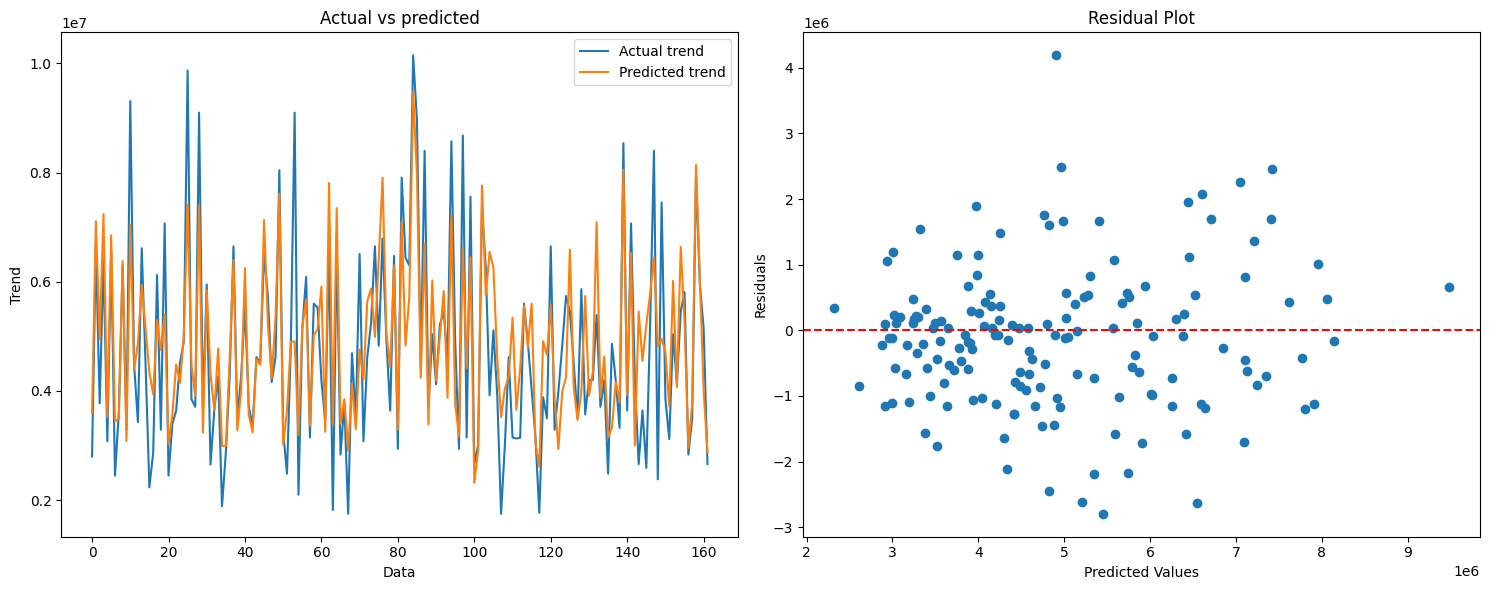

Evaluated score ----> 0.6532157679811783


In [163]:
#ridge regression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_squared_error', cv= 5)
ridge_regressor.fit(x_train,y_train)

y_pred =ridge_regressor.predict(x_test)


# Evaluation of the trained model on test dataset
plt.figure(figsize=(15, 6))
from sklearn.metrics import r2_score
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_pred)
plt.legend(["Actual trend","Predicted trend"])
plt.xlabel('Data')
plt.ylabel('Trend')
plt.title("Actual vs predicted")

# Plot residuals

plt.subplot(1,2,2)
residuals= y_test - y_pred
# plt.subplot(1,2,2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
print("Evaluated score ---->" ,r2_score(y_test, y_pred))

c:\Users\ayush\Desktop\Study\big oh training\Big oh training\Big-Oh-Training\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+14, tolerance: 7.489e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\ayush\Desktop\Study\big oh training\Big oh training\Big-Oh-Training\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+14, tolerance: 8.929e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\ayush\Desktop\Study\big oh training\Big oh training\Big-Oh-Training\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective 

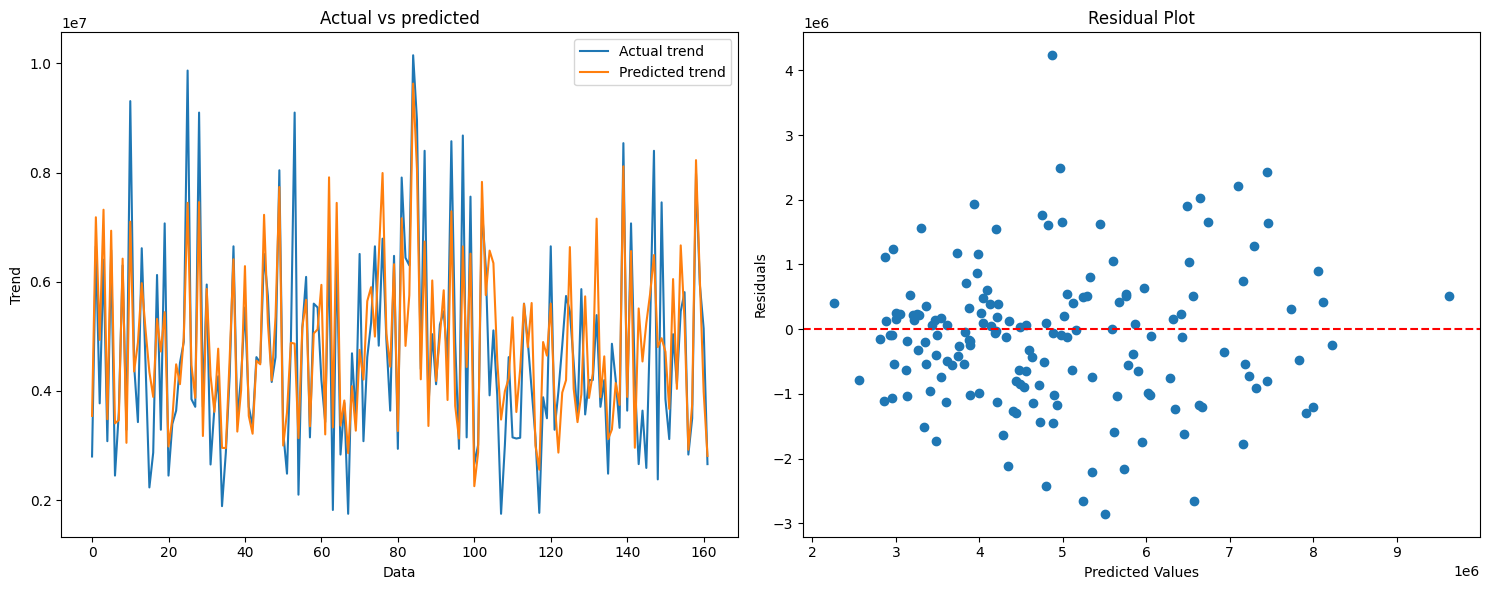

Evaluated score ----> 0.6530510104956635


In [164]:
#Lasso regression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_squared_error', cv= 5)
lasso_regressor.fit(x_train,y_train)

y_pred =lasso_regressor.predict(x_test)

# Evaluation of the trained model on test dataset
plt.figure(figsize=(15, 6))
from sklearn.metrics import r2_score
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_pred)
plt.legend(["Actual trend","Predicted trend"])
plt.xlabel('Data')
plt.ylabel('Trend')
plt.title("Actual vs predicted")

# Plot residuals

plt.subplot(1,2,2)
residuals= y_test - y_pred
# plt.subplot(1,2,2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
print("Evaluated score ---->" ,r2_score(y_test, y_pred))

# ADAboost regressor 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


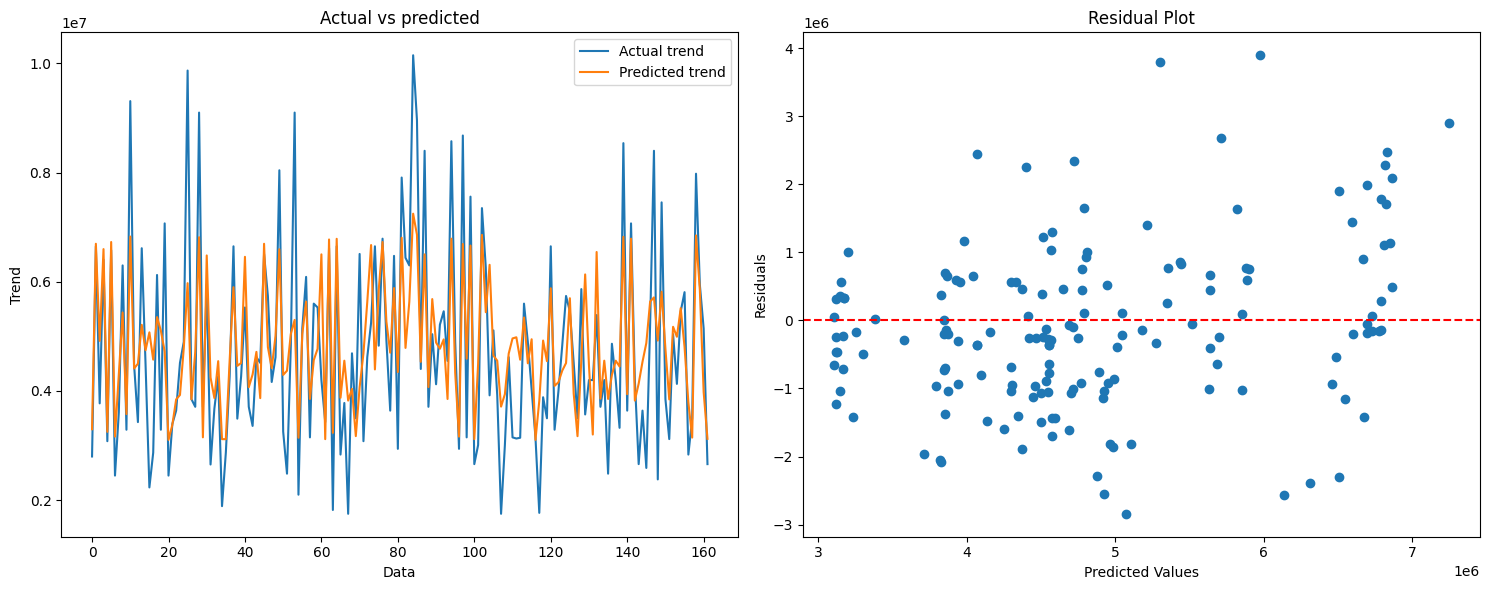

Evaluated score ----> 0.5592361107471855


In [165]:
from sklearn.ensemble import AdaBoostRegressor
params = {'n_estimators':[10,20,30,50,100,200]}
ABR = AdaBoostRegressor(random_state=0, learning_rate=0.01)
ABR_model = GridSearchCV(estimator=ABR, param_grid=params,verbose=1, scoring='r2', cv= 5)
ABR_model.fit(x_train,y_train)
y_pred = ABR_model.predict(x_test)
# Evaluation of the trained model on test dataset
plt.figure(figsize=(15, 6))
from sklearn.metrics import r2_score
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_pred)
plt.legend(["Actual trend","Predicted trend"])
plt.xlabel('Data')
plt.ylabel('Trend')
plt.title("Actual vs predicted")

# Plot residuals

plt.subplot(1,2,2)
residuals= y_test - y_pred
# plt.subplot(1,2,2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
print("Evaluated score ---->" ,r2_score(y_test, y_pred))

# Random Forest regressor model

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Estimator RandomForestRegressor(max_depth=80, max_features=3, min_samples_split=10,
                      n_estimators=200, random_state=42)
Best score 0.613656779595417


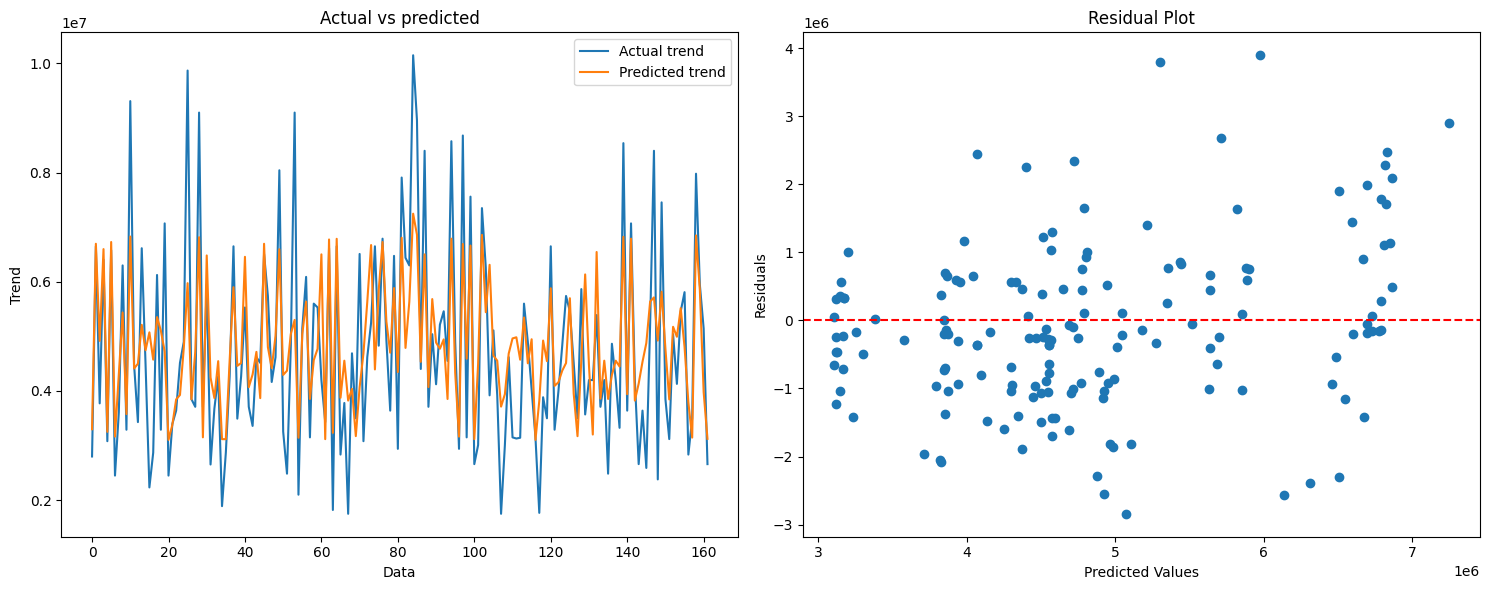

Evaluated score ----> 0.5592361107471855


In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor(random_state = 42)





param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 5, 7],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}



grid_search_cv = GridSearchCV(estimator=model, 
                              param_grid = param_grid, verbose=1, cv=5,scoring='r2',n_jobs=-1 )



grid_search_cv.fit(x_train, y_train)
print("Best Estimator", grid_search_cv.best_estimator_)
print("Best score", grid_search_cv.best_score_) 

# Evaluation of the trained model on test dataset
plt.figure(figsize=(15, 6))
from sklearn.metrics import r2_score
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_pred)
plt.legend(["Actual trend","Predicted trend"])
plt.xlabel('Data')
plt.ylabel('Trend')
plt.title("Actual vs predicted")

# Plot residuals

plt.subplot(1,2,2)
residuals= y_test - y_pred
# plt.subplot(1,2,2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
print("Evaluated score ---->" ,r2_score(y_test, y_pred))

# DNN Model

In [168]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

Epoch 1/100
12/12 [==============================] - 2s 4ms/step - loss: 24495563735040.0000
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 24481582022656.0000
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 24413133078528.0000
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 24212152516608.0000
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 23763450068992.0000
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 22918920667136.0000
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 21525713387520.0000
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 19446070509568.0000
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 16756424835072.0000
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 13449829548032.0000
Epoch 11/100
12/12 [==============================] - 0s 3ms/step - l

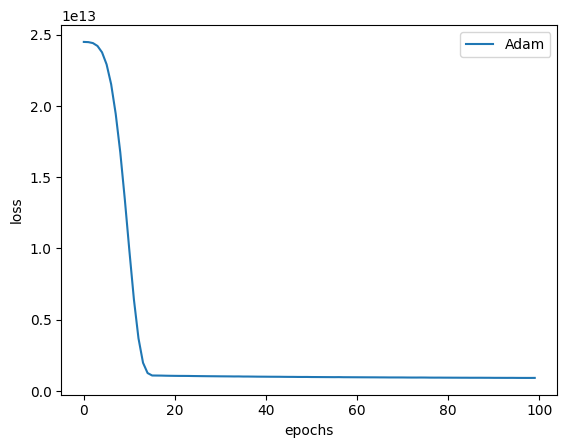

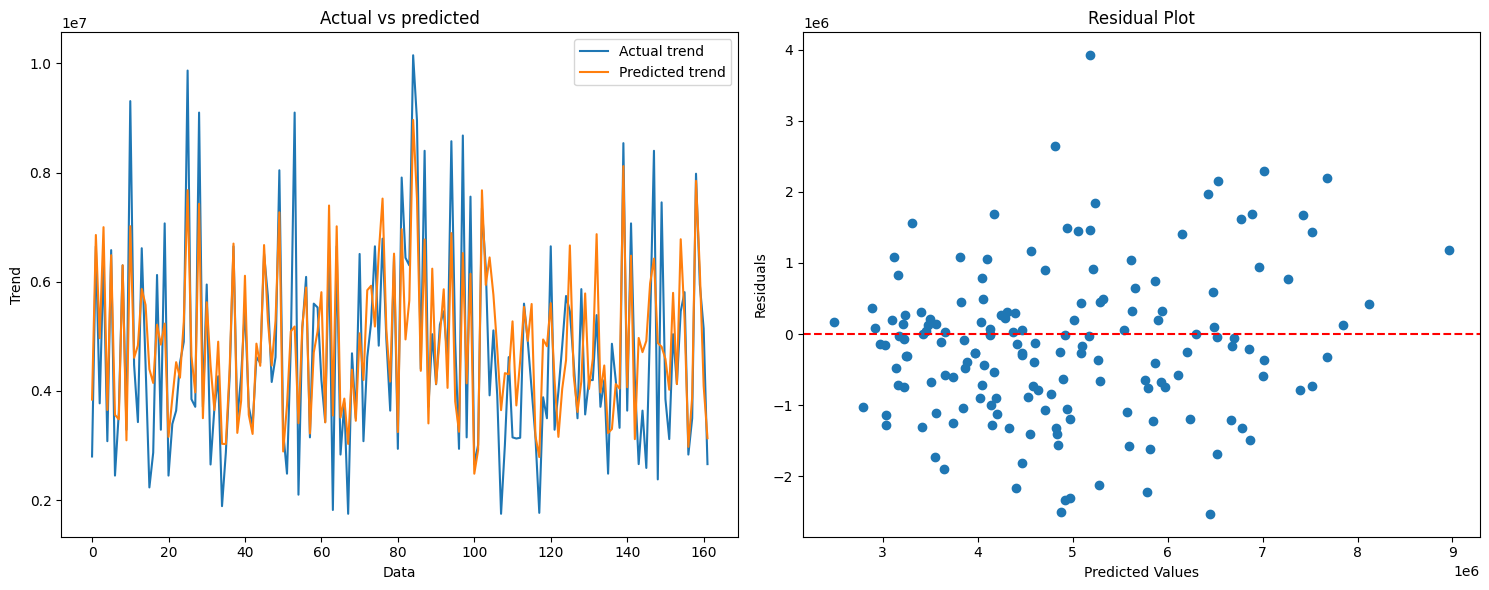

Evaluated score ----> 0.6535900977883631


In [185]:

model = Sequential()
model.add(Dense(14, activation='relu')) # input layer
model.add(Dense(20, activation='relu')) #hidden layer
model.add(Dense(1))#output layer
model.compile(optimizer = Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-8, amsgrad=False), loss=mse) # loss function mean squared error
train = model.fit(x_train, y_train, epochs=100)
plt.plot(train.history['loss'], label = 'loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Adam'])
y_pred = model.predict(x_test)

# Evaluation of the trained model on test dataset
plt.figure(figsize=(15, 6))
from sklearn.metrics import r2_score
plt.subplot(1,2,1)
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), y_pred)
plt.legend(["Actual trend","Predicted trend"])
plt.xlabel('Data')
plt.ylabel('Trend')
plt.title("Actual vs predicted")

# Plot residuals

plt.subplot(1,2,2)
y_pred= y_pred.reshape(y_pred.shape[0])
residuals= y_test - y_pred
# plt.subplot(1,2,2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()
print("Evaluated score ---->" ,r2_score(y_test, y_pred))